# DU Level 1: Post-translational Modifications of Proteins In Three Dimensions


## **🔬 Introduction: What Are Post-Translational Modifications (PTMs)?**  

Proteins undergo **post-translational modifications (PTMs)**, which are **chemical changes that occur after a protein is synthesized (translated) in the cell**. These modifications **regulate protein function, stability, localization, and interactions**. PTMs can be **enzymatically driven** (e.g., phosphorylation, ubiquitination) or occur **spontaneously** (e.g., oxidation).  

### **🔎 How Do PTMs Occur?**  
PTMs typically happen through **enzymes that recognize specific amino acid sequences** and modify them by **adding or removing chemical groups**. Some common PTMs include:  
✔ **Phosphorylation** (*adds a phosphate group, regulating signaling pathways*)  
✔ **Acetylation** (*modifies lysine residues, affecting gene expression and protein stability*)  
✔ **Glycosylation** (*adds sugar chains, crucial for protein folding and immune recognition*)  
✔ **Ubiquitination** (*tags proteins for degradation, controlling protein lifespan*)  

These modifications **dramatically alter protein structure and function**, influencing everything from **enzyme activity to protein-protein interactions**.  

---

## **📊 Large-Scale Protein Structure & PTM Data Resources**  

Over the years, scientists have mapped thousands of PTMs onto experimentally determined protein structures. These datasets are stored in **large-scale protein databases**, including:  

### **📁 The Protein Data Bank (PDB)**  
The **Protein Data Bank (PDB) [www.rcsb.org](https://www.rcsb.org/)** is the **largest repository of 3D protein structures**, with over **200,000 experimentally determined structures**. These structures are resolved using techniques like **X-ray crystallography, cryo-EM, and NMR spectroscopy**.  

### **🧬 PTM-Specific Databases**  
In parallel, researchers have compiled PTM data into specialized databases:  
✔ **PhosphoSitePlus** (*Curated database of experimentally validated phosphorylation sites*)  
✔ **dbPTM** (*Comprehensive collection of PTMs from literature and computational predictions*)  
✔ **UniProtKB** (*Stores PTM annotations for thousands of proteins*)  

By **integrating PDB structures with PTM databases**, we can **map known PTM sites onto protein structures** to explore their **functional roles and structural impact**.  

---

## **🎯 Capstone Project Goal: Mapping PTMs to 3D Protein Structures**  

This project will involve:  
✅ Extracting 3D structures from **PDB** for proteins with known PTMs.  
✅ Integrating PTM data from **PTM databases**.  
✅ **Visualizing PTM sites in 3D** to understand their structural context.  
✅ Analyzing how PTMs **alter protein interactions, stability, or function**.  

By the end of this project, you will have explored **how PTMs shape protein behavior** and gained **hands-on experience in structural bioinformatics**! 🚀  


---
Content from this workflow was adapted from: https://github.com/sbl-sdsc/mmtf-proteomics

This notebook retrieves about 30 types of PTMs (~900,000 residues) from [dbPTM](http://dbptm.mbc.nctu.edu.tw/) and maps them to 3D Protein Structures from the [Protein Data Bank](https://www.wwpdb.org/).

To visualize the results, run the notebook all the way past the spark.stop command.

The dataset used in this notebook is a compressed and indexed version of the data from:

dbPTM 2016: 10-year anniversary of a resource for post-translational modification of proteins.
Huang KY, Su MG, Kao HJ, Hsieh YC, Jhong JH, Cheng KH, Huang HD, Lee TY.
Nucleic Acids Res. (2016) 44(D1):D435-46. [doi: 10.1093/nar/gkv1240](https://doi.org/10.1093/nar/gkv1240).

---

First, we will load all of the libraries and tools needed to get started: 

In [1]:
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import collect_set, collect_list, col, concat_ws
from ipywidgets import interact, IntSlider, widgets
from IPython.display import display
from mmtfPyspark.datasets import pdbToUniProt, dbPtmDataset
import py3Dmol

In [2]:
spark = SparkSession.builder.appName("BrowseDbPTM").getOrCreate()

2025-02-27 23:58:08 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


## **🚀 1.0 Why Use Apache Spark for Large-Scale Data Processing?**  

### **🔎 What is Apache Spark?**  
Apache Spark is a **powerful open-source distributed computing framework** designed for processing **large-scale datasets efficiently**. Unlike traditional data processing tools, Spark can **handle massive amounts of data in parallel**, making it significantly faster than standard computing methods.  

### **💡 Why is Spark Needed for PDB Analysis?**  
The **Protein Data Bank (PDB)** contains **over 200,000** experimentally determined **3D protein structures**. Each structure consists of thousands of atomic coordinates, metadata, and annotations. **Processing this vast dataset requires efficient, scalable computing**, which is where Spark comes in.  

### **⚡ Key Advantages of Spark for PDB Analysis**  
✔ **Distributed Computing** → Processes large datasets across multiple machines or cores.  
✔ **In-Memory Processing** → Reduces disk I/O, making computations much faster.  
✔ **Scalability** → Handles increasing data sizes efficiently without performance bottlenecks.  
✔ **Integration with Big Data Ecosystem** → Works seamlessly with **Hadoop, SQL, and ML frameworks**.  

### **📊 Real-World Application: PDB Processing with Spark**  
By leveraging **Apache Spark**, we can:  
🔹 Process and filter **large PDB datasets** in parallel.  
🔹 Extract key protein features **efficiently**.  
🔹 Integrate PDB structures with **biological annotations** (e.g., PTMs, binding sites).  

In this workflow, we will use Spark to **accelerate large-scale PDB analysis**, making it easier to uncover meaningful biological insights from complex structural data. 🚀  


## 1.1 Read dbPTM dataset

In [3]:
db_ptm = dbPtmDataset.get_ptm_dataset()
print("Total number of PTMs:", db_ptm.count())
db_ptm.limit(5).toPandas()

Total number of PTMs: 906354


,uniProtName,uniProtId,uniProtSeqNum,ptmType,pubMedIds,sequenceSegment
0,14310_ARATH,P48347,209,Phosphorylation,"[23328941, 23572148]",AFDDAIAELDSLNEESYKDST
1,14310_ARATH,P48347,233,Phosphorylation,[23572148],QLLRDNLTLWTSDLNEEGDER
2,14310_ARATH,P48347,234,Phosphorylation,[18463617],LLRDNLTLWTSDLNEEGDERT
3,14310_ARATH,P48347,244,Phosphorylation,"[23572148, 20466843, 20733066, 24243849, 19880...",SDLNEEGDERTKGADEPQDEN
4,14312_ARATH,Q9C5W6,41,Phosphorylation,"[22631563, 24243849, 19880383]",ETMKKVARVNSELTVEERNLL


#### Create a unique list of all PTM types and an "All" type to represent all PTM types

In [4]:
ptm_types = db_ptm.select('ptmType').distinct().sort('ptmType').toPandas()['ptmType'].tolist()
ptm_types = ['All'] + ptm_types

## **📌 Exercise 1.1: Exploring PTMs Across Proteins in the PDB**  

### **🔎 Insights**  

You will answer key questions such as:  
✔ **How many unique proteins** are being queried?  
✔ **How many PTMs per protein** on average?  
✔ **Which proteins have the most PTMs?**  

---

## **📝 Your Tasks:**  

1️⃣ **Count the number of unique proteins** in the PTM dataset.  
2️⃣ **Calculate the average number of PTMs per protein**.  
3️⃣ **Find the top 5 proteins with the largest number of PTMs**.  
4️⃣ **Visualize the distribution of PTMs per protein** using a histogram.  

---

## **💻 Example Code to Get Started**


✅ Total unique proteins with PTMs: 137509
✅ Average PTMs per protein: 6.59
+---------+--------+
|uniProtId|num_ptms|
+---------+--------+
|   Q02817|    1213|
|   A2ASS6|    1157|
|   Q8WZ42|    1078|
|   Q09666|     986|
|   Q8WXI7|     774|
+---------+--------+



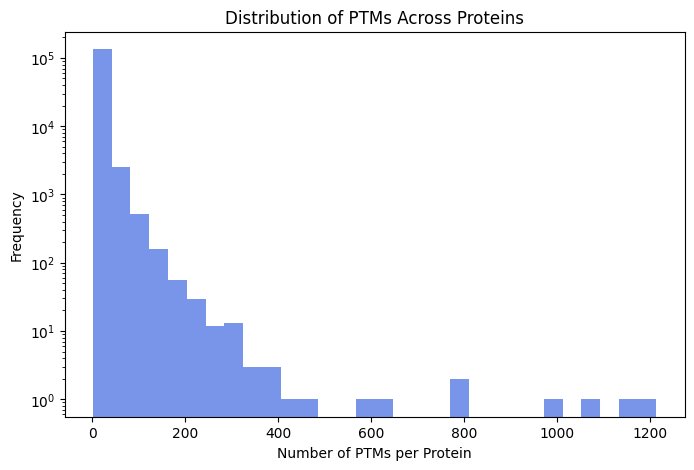

In [5]:
# 🔢 Count the number of unique proteins in the PTM dataset
unique_proteins = db_ptm.select("uniProtId").distinct().count()
print(f"✅ Total unique proteins with PTMs: {unique_proteins}")

# 🏷️ Count the number of PTMs per protein
ptms_per_protein = db_ptm.groupBy("uniProtId").count()
ptms_per_protein = ptms_per_protein.withColumnRenamed("count", "num_ptms")

# 📊 Compute statistics on PTM distribution
avg_ptms = ptms_per_protein.agg({"num_ptms": "avg"}).collect()[0][0]
print(f"✅ Average PTMs per protein: {avg_ptms:.2f}")

# 🔎 Find the top 5 proteins with the highest number of PTMs
top_proteins = ptms_per_protein.orderBy("num_ptms", ascending=False).limit(5)
top_proteins.show()

# 📊 Visualize the PTM distribution using a histogram
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas for plotting
ptm_pandas = ptms_per_protein.toPandas()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(ptm_pandas["num_ptms"], bins=30, color="royalblue", alpha=0.7)
plt.xlabel("Number of PTMs per Protein")
plt.ylabel("Frequency")
plt.title("Distribution of PTMs Across Proteins")
plt.yscale("log")  # Log scale to better visualize the spread
plt.show()


## **📌 Exercise 1.2 : Exploring the Diversity of PTMs**  

### **🔎 Background**  
Post-translational modifications (PTMs) come in many different forms, each playing a **unique role in protein regulation, signaling, and stability**. Some PTMs, like **phosphorylation** and **ubiquitination**, are well-studied, while others, like **crotonylation** and **gamma-carboxyglutamic acid modification**, are less common but equally important.  

In this exercise, we will:  
✔ Identify **how many different types of PTMs exist in the dataset**.  
✔ List **all unique PTM types found in the PDB dataset**.  
✔ Investigate which **PTMs are most and least common**.  

---

## **📝 Your Tasks:**  

1️⃣ **Count the number of distinct PTM types** in the dataset.  
2️⃣ **List all unique PTM types** and sort them alphabetically.  
3️⃣ **Determine the most and least frequent PTM types**.  
4️⃣ **Visualize the distribution of PTM types** with a bar plot.  

---

## **💻 Example Code to Get Started**


✅ Total distinct PTM types in the dataset: 31
🧬 List of PTM types:
- Acetylation
- Amidation
- C-linked Glycosylation
- Carbamidation
- Citrullination
- Crotonylation
- Formylation
- GPI-anchor
- Gamma-carboxyglutamic acid
- Glutathionylation
- Lipoylation
- Malonylation
- Methylation
- Myristoylation
- N-linked Glycosylation
- Neddylation
- Nitration
- O-linked Glycosylation
- Oxidation
- Palmitoylation
- Phosphorylation
- Pyrrolidone carboxylic acid
- Pyruvate
- S-Nitrosylation
- S-diacylglycerol
- S-linked Glycosylation
- S-nitrosylation
- Succinylation
- Sulfation
- Sumoylation
- Ubiquitination


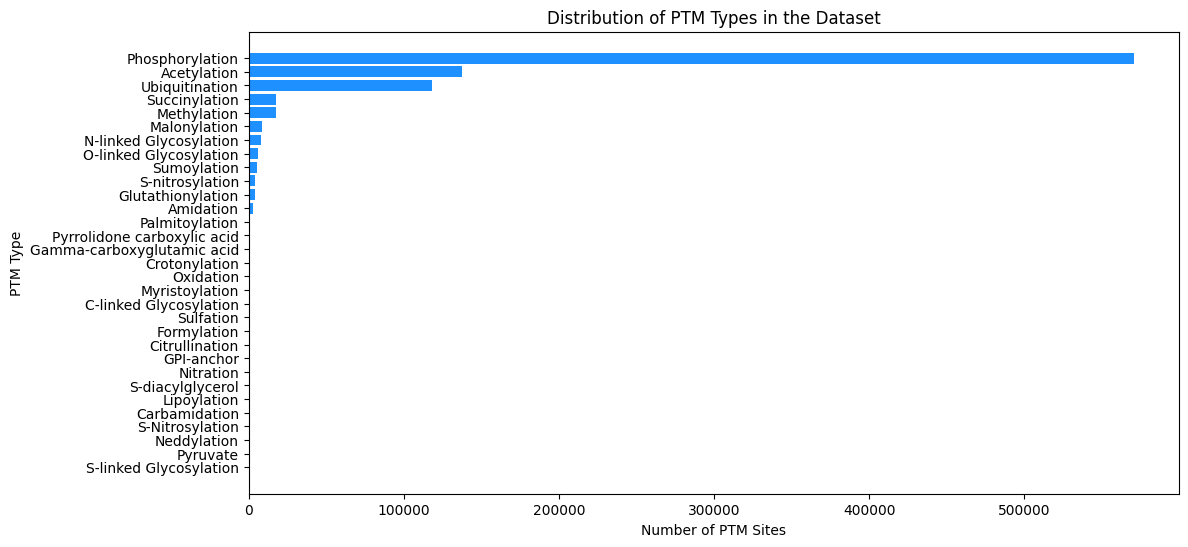

In [6]:
# 🔎 Get the list of unique PTM types
ptm_types = db_ptm.select('ptmType').distinct().sort('ptmType').toPandas()['ptmType'].tolist()

# 📢 Display the total number of PTM types
print(f"✅ Total distinct PTM types in the dataset: {len(ptm_types)}")

# 📃 List of PTM types
print("🧬 List of PTM types:")
for ptm in ptm_types:
    print(f"- {ptm}")

# 🔢 Count occurrences of each PTM type
ptm_counts = db_ptm.groupBy("ptmType").count().orderBy("count", ascending=False)
ptm_counts_df = ptm_counts.toPandas()

# 📊 Plot the distribution of PTM types
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(ptm_counts_df["ptmType"], ptm_counts_df["count"], color="dodgerblue")
plt.xlabel("Number of PTM Sites")
plt.ylabel("PTM Type")
plt.title("Distribution of PTM Types in the Dataset")
plt.gca().invert_yaxis()  # Flip for better readability
plt.show()

## **📌 Exercise 1.3: PTM Distribution Analysis**  

### **🔎 Background**  
Not all PTMs occur with the same frequency—some, like **phosphorylation**, are highly abundant, while others, like **crotonylation**, are relatively rare. Understanding the **relative proportions** of PTMs across all proteins can provide insights into their **biological importance and regulatory roles**.  

In this exercise, we will:  
✔ Compute the **percentage of each PTM type** relative to all PTMs.  
✔ Create a **pie chart** to visualize PTM distribution.  
✔ Identify the **most and least frequent PTM types**.  

---

## **📝 Your Tasks:**  

1️⃣ **Count the total number of PTM occurrences** in the dataset.  
2️⃣ **Calculate the percentage of each PTM type** relative to all PTMs.  
3️⃣ **Generate a pie chart to visualize the distribution** of PTMs.  
4️⃣ **Interpret the results**: Why are certain PTMs more abundant than others?  

---

## **💻 Example Code to Get Started**


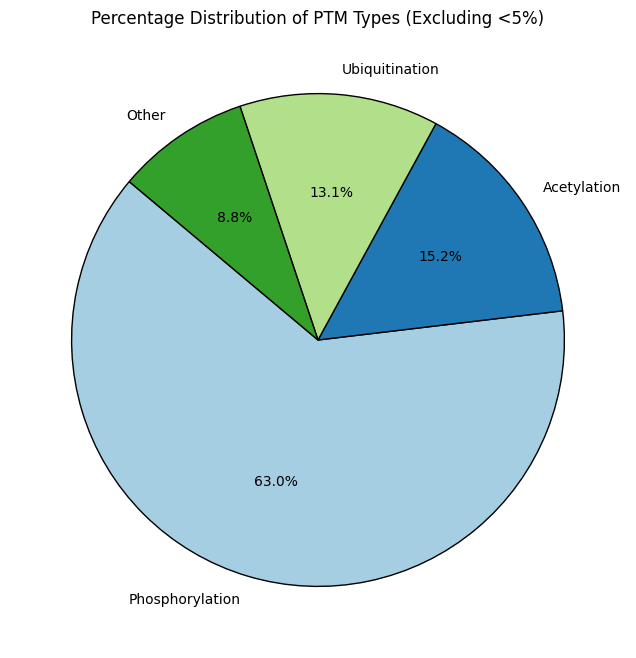

In [7]:

import matplotlib.pyplot as plt

# 🔢 Count occurrences of each PTM type
ptm_counts = db_ptm.groupBy("ptmType").count().orderBy("count", ascending=False)
ptm_counts_df = ptm_counts.toPandas()

# 🔢 Calculate percentage of each PTM type
total_ptms = ptm_counts_df["count"].sum()
ptm_counts_df["percentage"] = (ptm_counts_df["count"] / total_ptms) * 100

# 📉 Filter out PTMs that contribute less than 5%
filtered_ptm_counts_df = ptm_counts_df[ptm_counts_df["percentage"] >= 5]

# 🔄 Group all PTMs < 5% into "Other"
other_percentage = ptm_counts_df[ptm_counts_df["percentage"] < 5]["percentage"].sum()

# 🛠️ Add "Other" category if needed
if other_percentage > 0:
    other_row = pd.DataFrame([{"ptmType": "Other", "percentage": other_percentage}])
    filtered_ptm_counts_df = pd.concat([filtered_ptm_counts_df, other_row])

# 🎨 Create a pie chart
plt.figure(figsize=(10,8))
plt.pie(
    filtered_ptm_counts_df["percentage"], 
    labels=filtered_ptm_counts_df["ptmType"], 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=plt.cm.Paired.colors, 
    wedgeprops={"edgecolor": "black"}
)

plt.title("Percentage Distribution of PTM Types (Excluding <5%)")
plt.show()


## **📌 2.0 Mapping a Specific PTM to Protein Structures in the PDB**  

### **🔎 Background**  
Post-translational modifications (PTMs) play a **crucial role in regulating protein structure and function**. By modifying specific amino acids, PTMs can **alter protein stability, interaction networks, enzymatic activity, and localization**.  

In this section, we will focus on a **specific PTM type** (e.g., **phosphorylation, ubiquitination, glycosylation**) and investigate:  
✔ **Which proteins in the PDB contain this PTM?**  
✔ **Where does the PTM occur on the protein structure?**  
✔ **Are there structural patterns or conserved sites for this modification?**  

By integrating **PDB structural data** with **PTM annotations**, we can visualize and analyze how **these modifications influence protein conformation and interactions**. This approach allows us to uncover **functional insights** into how proteins are regulated at the molecular level. 🚀  


## 2.1 Select PTM Type
The default is set to N-linked Glycosylation. To rerun this notebook with a different PTM type, rerun this notebook from the top!

In [8]:
field = widgets.Dropdown(options=ptm_types,description='Select PTM:',value='N-linked Glycosylation')

In [9]:
display(field)

Dropdown(description='Select PTM:', index=14, options=('Acetylation', 'Amidation', 'C-linked Glycosylation', '…

In [10]:
if field.value == 'All':
    df = db_ptm
else:
    query = "ptmType = '" + field.value + "'"
    print("query:", query)
    df = db_ptm.filter(query)
    print("Number of PTMs that match query:", df.count())

query: ptmType = 'N-linked Glycosylation'
Number of PTMs that match query: 7915


## 2.2 Get PDB to UniProt Residue Mappings

Download PDB to UniProt mappings and filter out residues that were not observed in the 3D structure.

In [11]:
up = pdbToUniProt.get_cached_residue_mappings().filter("pdbResNum IS NOT NULL")

Show some sample data

In [12]:
mappings = up.count()
print("Mappings:", mappings)
up.sample(False, 5/mappings).toPandas().head()

Mappings: 98498569


,structureChainId,pdbResNum,pdbSeqNum,uniprotId,uniprotNum
0,6FII.D,304,302,Q6B856,302.0
1,4R7Z.G,316,55,None,NaN
2,2W6O.A,408,408,P24182,408.0
3,2HBX.B,3,3,Q83V25,3.0
4,1N92.B,39,39,P00327,40.0


Find the intersection between the PTM dataset and PDB to UniProt mappings

In [13]:
up = up.withColumnRenamed("uniprotId","unpId")
st = up.join(df, (up.unpId == df.uniProtId) & (up.uniprotNum == df.uniProtSeqNum)).drop("unpId")

## 2.3 Aggregate PTM data on a per residue and per chain basis

In [14]:
st = st.groupBy("structureChainId","pdbResNum","uniProtId","uniProtName").agg(collect_set("ptmType").alias("ptms"))
st = st.withColumn("ptms", concat_ws((","), col("ptms")))
st = st.groupBy("structureChainId","uniProtId","uniProtName").agg(collect_list("pdbResNum").alias("pdbResNum"), collect_list("ptms").alias("ptms"))

Convert aggregated data to Pandas and display some results

In [15]:
pst = st.toPandas()
pst.head()

,structureChainId,uniProtId,uniProtName,pdbResNum,ptms
0,4WJL.B,Q8N608,DPP10_HUMAN,"[748, 90, 119, 342, 257, 111]","[N-linked Glycosylation, N-linked Glycosylatio..."
1,1XKU.A,P21793,PGS2_BOVIN,"[274, 182, 233]","[N-linked Glycosylation, N-linked Glycosylatio..."
2,2Q7N.B,P15018,LIF_HUMAN,"[34, 116, 96, 73, 9, 63]","[N-linked Glycosylation, N-linked Glycosylatio..."
3,1E4M.M,P29736,MYRA_SINAL,"[482, 361, 346, 244, 60, 292, 343, 90, 265, 21...","[N-linked Glycosylation, N-linked Glycosylatio..."
4,3Q7D.A,Q05769,PGH2_MOUSE,"[68, 144, 410]","[N-linked Glycosylation, N-linked Glycosylatio..."


Setup custom visualization

In [16]:
def view_modifications(df, cutoff_distance, *args):

    def view3d(show_labels=True,show_bio_assembly=False, show_surface=False, i=0):
        pdb_id, chain_id = df.iloc[i]['structureChainId'].split('.')
        res_num = df.iloc[i]['pdbResNum']
        labels = df.iloc[i]['ptms']
        
        # print header
        print ("PDB Id: " + pdb_id + " chain Id: " + chain_id)
        
        # print any specified additional columns from the dataframe
        for a in args:
            print(a + ": " + df.iloc[i][a])
        
        mod_res = {'chain': chain_id, 'resi': res_num}  
        
        # select neigboring residues by distance
        surroundings = {'chain': chain_id, 'resi': res_num, 'byres': True, 'expand': cutoff_distance}
        
        viewer = py3Dmol.view(query='pdb:' + pdb_id, options={'doAssembly': show_bio_assembly})
    
        # polymer style
        viewer.setStyle({'cartoon': {'color': 'spectrum', 'width': 0.6, 'opacity':0.8}})
        # non-polymer style
        viewer.setStyle({'hetflag': True}, {'stick':{'radius': 0.3, 'singleBond': False}})
        
        # style for modifications
        viewer.addStyle(surroundings,{'stick':{'colorscheme':'orangeCarbon', 'radius': 0.15}})
        viewer.addStyle(mod_res, {'stick':{'colorscheme':'redCarbon', 'radius': 0.4}})
        viewer.addStyle(mod_res, {'sphere':{'colorscheme':'gray', 'opacity': 0.7}})
        
        # set residue labels    
        if show_labels:
            for residue, label in zip(res_num, labels):
                viewer.addLabel(residue + ": " + label, \
                                {'fontColor':'black', 'fontSize': 8, 'backgroundColor': 'lightgray'}, \
                                {'chain': chain_id, 'resi': residue})

        viewer.zoomTo(surroundings)
        
        if show_surface:
            viewer.addSurface(py3Dmol.SES,{'opacity':0.8,'color':'lightblue'})

        return viewer.show()
       
    s_widget = IntSlider(min=0, max=len(df)-1, description='Structure', continuous_update=False)
    
    return interact(view3d, show_labels=True, show_bio_assembly=False, show_surface=False, i=s_widget)

## 2.4 Visualize Results
Residues with reported modifications are shown in an all atom prepresentation as red sticks with transparent spheres. Each modified residue position is labeled by the PDB residue number and the type of the modification. Residues surrounding modified residue (within 6 A) are renderedas as thin orange sticks. Small molecules within the structure are rendered as gray sticks.

Note: You can check the boxes for different views of the proteins. You can use the scroll bar to scroll across thousands of PDB structures.

In [17]:
view_modifications(pst, 6, 'uniProtId', 'uniProtName');

interactive(children=(Checkbox(value=True, description='show_labels'), Checkbox(value=False, description='show…

## **📌 Exercise 2.1: Exploring PTM Locations in Protein Structures**  

### **🔎 Background**  
Post-translational modifications (PTMs) can significantly impact **protein structure, function, and interactions**. The location of a PTM—whether on the **surface** or **buried within the protein core**, or in a **structured** vs. **disordered region**—can provide clues about its biological role.  

In this exercise, you will use a **protein structure viewer** to explore **where PTMs are most commonly located** and reflect on why this may be the case.  

---

## **📝 Your Tasks:**  

1️⃣ **Locate PTMs on different proteins** in the viewer.  
2️⃣ **Determine whether PTMs tend to occur on the surface or deep within the protein structure.**  
3️⃣ **Observe if PTMs are more frequent in structured or disordered regions.**  
4️⃣ **Scroll across different proteins to identify general trends in PTM placement.**  

---

## **🔬 Discussion Questions:**  

1️⃣ **Do PTMs mostly occur on the surface or in the core of the protein? Why might that be?**  
2️⃣ **Are PTMs more commonly found in structured regions or in disordered regions?**  
3️⃣ **What types of PTMs are most often seen in different structural environments?**  
4️⃣ **How might the location of a PTM influence protein-protein interactions or stability?**  
5️⃣ **Why might certain PTMs be selectively placed in specific regions of a protein?**  

🚀 **Think critically about the functional implications of PTM placement and how this might affect protein regulation!**  


In [18]:
pip install gemmi

Note: you may need to restart the kernel to use updated packages.


In [19]:
import requests
import gemmi
import pandas as pd

# 🔹 Function to download AlphaFold structure files (PDB & CIF)
def download_alphafold_structure(uniprot_id):
    """Download AlphaFold PDB and CIF files for a given UniProt ID"""
    files_downloaded = {}

    for file_type in ["cif", "pdb"]:
        url = f"https://alphafold.ebi.ac.uk/files/AF-{uniprot_id}-F1-model_v4.{file_type}"
        response = requests.get(url)
        if response.status_code == 200:
            with open(f"{uniprot_id}.{file_type}", "wb") as file:
                file.write(response.content)
            files_downloaded[file_type] = f"{uniprot_id}.{file_type}"
            print(f"✅ {file_type.upper()} file for {uniprot_id} downloaded successfully.")
        else:
            print(f"❌ Failed to download {file_type.upper()} file. Status code: {response.status_code}")

    return files_downloaded

# 🔹 Function to parse CIF file and extract XYZ coordinates
def parse_cif_coordinates(cif_file):
    """Extract atomic coordinates from a CIF file"""
    doc = gemmi.cif.read(cif_file)
    block = doc.sole_block()
    
    data = {
        "atom_id": block.find_loop('_atom_site.label_atom_id'),
        "residue_id": block.find_loop('_atom_site.label_comp_id'),
        "residue_num": block.find_loop('_atom_site.label_seq_id'),
        "x_coord": [float(i) for i in block.find_loop('_atom_site.Cartn_x')],
        "y_coord": [float(i) for i in block.find_loop('_atom_site.Cartn_y')],
        "z_coord": [float(i) for i in block.find_loop('_atom_site.Cartn_z')]
    }

    xyz_coord_df = pd.DataFrame(data)
    return xyz_coord_df

# 🔹 Function to parse CIF file and extract structural motifs (helices, sheets)
def parse_cif_structure(cif_file):
    """Extract structured regions (helices, beta sheets) from a CIF file"""
    doc = gemmi.cif.read(cif_file)
    block = doc.sole_block()

    data = {
        "res_id": block.find_loop('_struct_conf.beg_auth_comp_id'),
        "res_num": block.find_loop('_struct_conf.beg_auth_seq_id'),
        "structural_motif": block.find_loop('_struct_conf.conf_type_id')
    }

    structural_info_df = pd.DataFrame(data)
    return structural_info_df

In [20]:
from itertools import chain

# 🔹 Function to extract PTM residues from a given uniProtId
def extract_PTM_residues(uniProtId):
    """Get only the imortant PTM'd residues"""

    # Sample nested list (your data)
    nested_list = list(pst[pst.uniProtId==uniProtId].pdbResNum.values.tolist())
    
    # Flatten and remove duplicates
    unique_values = list(set(chain(*nested_list)))
    
    # Sort for readability (optional)
    unique_values.sort()
    
    # return the final list
    return(unique_values)

In [21]:
# 🔹 Main Routine to Process Multiple Proteins
def process_protein_ptms(uniprot_ids):
    """
    Processes a list of UniProt IDs by downloading their AlphaFold structures,
    extracting XYZ coordinates, and mapping PTM locations to structured motifs.
    """
    final_results = []

    for uniprot_id in uniprot_ids:
        print(f"\n🔍 Processing {uniprot_id}...\n")

        # Download AlphaFold structure
        files = download_alphafold_structure(uniprot_id)
        if "cif" not in files:
            print(f"❌ Skipping {uniprot_id} (CIF file missing).")
            continue

        # Extract data from CIF file
        xyz_coord_df = parse_cif_coordinates(files["cif"])
        structural_info_df = parse_cif_structure(files["cif"])

        # add UniProtId to the Dataframe
        structural_info_df['UniProtId'] = [uniprot_id for i in structural_info_df.index]

        # Filter only PTM residues
        ptm_data = structural_info_df[structural_info_df.res_num.isin(extract_PTM_residues(uniprot_id))] 

        if not ptm_data.empty:
            final_results.append(ptm_data)

    # Combine all data into a single dataframe
    if final_results:
        final_df = pd.concat(final_results, ignore_index=True)
        print(f"\n✅ Processed {len(uniprot_ids)} proteins. Final dataset size: {final_df.shape}")
        return final_df
    else:
        print("\n⚠ No PTM-containing residues found in the dataset.")
        return pd.DataFrame()

In [22]:
# Example: Running the full routine
# Assume `ptm_df` is a dataframe containing PTM information with columns: ["uniprot_id", "ptm_residues"]
uniprot_list = ["P68871","P63098"]  # Example UniProt IDs
final_ptm_structure_df = process_protein_ptms(uniprot_list)

# Display the final PTM-structure dataset
display(final_ptm_structure_df.head())


🔍 Processing P68871...

✅ CIF file for P68871 downloaded successfully.
✅ PDB file for P68871 downloaded successfully.

🔍 Processing P63098...

✅ CIF file for P63098 downloaded successfully.
✅ PDB file for P63098 downloaded successfully.

⚠ No PTM-containing residues found in the dataset.


""


## **📌 Exercise : Large-Scale Analysis of PTM Locations in Structured vs. Unstructured Regions**  

### **🔎 Background**  
Post-translational modifications (PTMs) can be found in **both structured (e.g., alpha helices, beta sheets)** and **unstructured (loops, disordered regions)** parts of proteins. Their placement can affect **protein stability, interactions, and function**.  

In this exercise, you will **analyze a large set of proteins (100 UniProt IDs)** and determine whether PTMs occur **preferentially in structured or unstructured regions**.  

---

## **📝 Your Tasks:**  

1️⃣ **Generate a list of 1000 random UniProt IDs**.  
2️⃣ **Process these proteins by downloading their AlphaFold structures (CIF/PDB)** and extracting:  
   - **XYZ coordinates**
   - **Structural motifs (alpha helix, beta sheet, unstructured)**  
3️⃣ **Map PTMs to these structural features** and determine:  
   - **How many PTMs occur in structured vs. unstructured regions?**  
4️⃣ **Visualize the results using a pie chart or bar graph.**  

---

## **🔬 Discussion Questions:**  

1️⃣ **Do PTMs occur more frequently in structured or unstructured regions? Why?**  
2️⃣ **How does the PTM distribution vary between different protein families?**  
3️⃣ **What might be the functional consequences of PTMs in structured vs. unstructured regions?**  
4️⃣ **Are certain PTM types more common in specific structural motifs?**  
5️⃣ **How might these insights inform drug design or protein engineering?**  

🚀 **Bonus Challenge:** Try analyzing whether certain PTMs (e.g., phosphorylation, ubiquitination) are enriched in specific structural motifs.  


Note that you can select the set of proteins in the following way:

In [23]:
pst.uniProtId.unique().tolist()[0:1000]

['Q8N608',
 'P21793',
 'P15018',
 'P29736',
 'Q05769',
 'P61769',
 'P41948',
 'A7XY94',
 'P02763',
 'P27487',
 'O95497',
 'P01892',
 'Q70KY3',
 'P11609',
 'Q15485',
 'P56817',
 'Q1XA76',
 'P01008',
 'P80025',
 'P00742',
 'P05107',
 'P00797',
 'P41222',
 'P05543',
 'P04746',
 'P02745',
 'P06276',
 'Q9UMF0',
 'P06756',
 'P05164',
 'P01848',
 'P20701',
 'P05534',
 'P01031',
 'P08709',
 'Q9Y4K0',
 'P02766',
 'P00734',
 'P14925',
 'P05979',
 'P42260',
 'P56373',
 'P07686',
 'P28472',
 'P01903',
 'P35052',
 'P13671',
 'P10253',
 'O00180',
 'P68871',
 'P19491',
 'P27907',
 'P35936',
 'P00433',
 'Q16849',
 'Q10714',
 'P04058',
 'P01024',
 'P14784',
 'Q9H6X2',
 'P28314',
 'P04115',
 'P31371',
 'P02701',
 'P12807',
 'P01731',
 'P56734',
 'Q15661',
 'Q9Y2G5',
 'P53634',
 'P08174',
 'P02675',
 'O97148',
 'P22303',
 'P07996',
 'P01857',
 'P25311',
 'P45452',
 'Q96KN2',
 'P06802',
 'P01833',
 'P97333',
 'Q2EEY0',
 'P10636',
 'P03952',
 'P35439',
 'P04062',
 'P16410',
 'Q9UHP7',
 'O75581',
 'Q9Y275',

Or, you can use a random number generator and select them that way! 

In [24]:
uniprot_list = pst.uniProtId.unique().tolist()[0:1000]  # Example UniProt IDs
final_ptm_structure_df = process_protein_ptms(uniprot_list)

# Display the final PTM-structure dataset
display(final_ptm_structure_df.head())


🔍 Processing Q8N608...

✅ CIF file for Q8N608 downloaded successfully.
✅ PDB file for Q8N608 downloaded successfully.

🔍 Processing P21793...

✅ CIF file for P21793 downloaded successfully.
✅ PDB file for P21793 downloaded successfully.

🔍 Processing P15018...

✅ CIF file for P15018 downloaded successfully.
✅ PDB file for P15018 downloaded successfully.

🔍 Processing P29736...

✅ CIF file for P29736 downloaded successfully.
✅ PDB file for P29736 downloaded successfully.

🔍 Processing Q05769...

✅ CIF file for Q05769 downloaded successfully.
✅ PDB file for Q05769 downloaded successfully.

🔍 Processing P61769...

✅ CIF file for P61769 downloaded successfully.
✅ PDB file for P61769 downloaded successfully.

🔍 Processing P41948...

✅ CIF file for P41948 downloaded successfully.
✅ PDB file for P41948 downloaded successfully.

🔍 Processing A7XY94...

✅ CIF file for A7XY94 downloaded successfully.
✅ PDB file for A7XY94 downloaded successfully.

🔍 Processing P02763...

✅ CIF file for P02763 d

,res_id,res_num,structural_motif,UniProtId
0,ASN,119,HELX_RH_AL_P,Q8N608
1,GLU,274,STRN,P21793
2,GLY,96,BEND,P15018
3,ASN,482,STRN,P29736
4,LYS,68,HELX_LH_PP_P,Q05769


In [25]:
import glob
import os
from IPython.display import clear_output
import time


# 🔹 Function to delete a file
def delete_file(file_path):
    """Deletes a file after processing"""
    try:
        os.remove(file_path)
        print(f"🗑 Deleted: {file_path}")
    except Exception as e:
        print(f"❌ Error deleting {file_path}: {e}")

# 🔍 Get the current working directory
data_dir = os.getcwd()  # This automatically sets the script's directory

# 🔹 Loop through all CIF & PDB files in the working directory
for file_type in ["cif", "pdb"]:
    for file_path in glob.glob(os.path.join(data_dir, f"*.{file_type}")):
        print(f"\n🔍 Processing {file_path}...")

        # Delete file after processing
        delete_file(file_path)

        # 🧹 Clear output after each file
        time.sleep(0.5)  # Allows message display before clearing (optional)
        clear_output(wait=True)

print("\n✅ All CIF/PDB files processed and deleted.")


✅ All CIF/PDB files processed and deleted.


In [26]:
final_ptm_structure_df.head()

,res_id,res_num,structural_motif,UniProtId
0,ASN,119,HELX_RH_AL_P,Q8N608
1,GLU,274,STRN,P21793
2,GLY,96,BEND,P15018
3,ASN,482,STRN,P29736
4,LYS,68,HELX_LH_PP_P,Q05769


In [27]:
len(final_ptm_structure_df.UniProtId.unique())

411

In [28]:
final_ptm_structure_df.structural_motif.unique()

array(['HELX_RH_AL_P', 'STRN', 'BEND', 'HELX_LH_PP_P', 'TURN_TY1_P',
       'HELX_RH_3T_P'], dtype=object)

In [29]:
final_ptm_structure_df.structural_motif.value_counts()

STRN            189
BEND            188
TURN_TY1_P      159
HELX_RH_AL_P     50
HELX_LH_PP_P     39
HELX_RH_3T_P     22
Name: structural_motif, dtype: int64

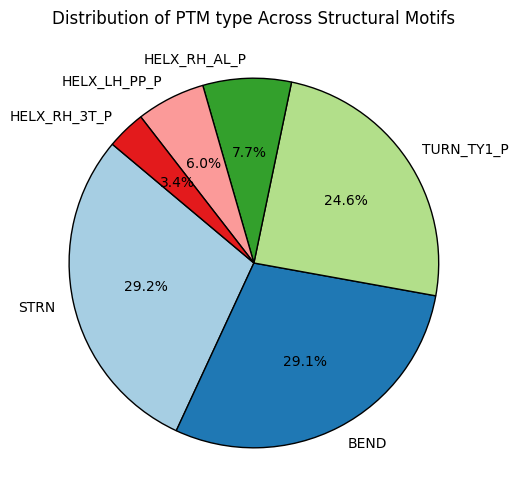

In [30]:

# 🔢 Count occurrences of PTMs in each structural motif
motif_counts = final_ptm_structure_df["structural_motif"].value_counts()

# 🎨 Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(
    motif_counts, 
    labels=motif_counts.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=plt.cm.Paired.colors, 
    wedgeprops={"edgecolor": "black"}
)

plt.title("Distribution of PTM type Across Structural Motifs")
plt.show()


## 📌 Assignment: Exploring PTM Distribution Across Structural Motifs & Amino Acid Preferences  

### 🔎 Background  
Post-translational modifications (PTMs) regulate **protein function, stability, and interactions**, but their **structural context** within a protein can influence their biological effects.  

In this assignment, we will analyze:  
✔ **Where PTMs occur in protein structures** (e.g., helices, loops, beta-sheets).  
✔ **Which amino acids are most frequently modified.**  

Using `final_ptm_structure_df`, which contains **PTM locations, structural motifs, and residue identities**, we will explore patterns in PTM placement.  

---

## 📝 Your Tasks  

### 📊 Part 1: PTM Distribution Across Structural Motifs  

1️⃣ **Count the number of PTMs in each structural motif.**  
2️⃣ **Create a pie chart** in different PTM types to show PTM proportions across secondary structures.  
3️⃣ **Analyze the trends** by answering:  
   - Do PTMs prefer structured (helices, sheets) or unstructured (loops, turns) regions?  
   - Why might certain motifs be more enriched for modifications?  
   - How might PTM placement affect protein stability and function?  
